# Data Exploration

## Install and import required libraries

In [ ]:
# Necessary Librabries
import pandas as pd
import numpy as np
import re
import os
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import nltk
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud
from collections import Counter

In [ ]:
gpus = tf.config.list_physical_devices('GPU')

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.experimental.set_memory_growth(gpus[0], True)

## Read datasets

In [ ]:
full_data = pd.read_csv('../dataset/full_dataset_final.csv')
train_final = pd.read_csv('../dataset/train_aug.csv')
test_final = pd.read_csv('../dataset/test.csv')

## Corpus information

### Full dataset

In [ ]:
print("Length of crawled data: ", full_data.shape[0])

Length of crawled data:  20295


In [ ]:
total_word_count = full_data['clean_text'].apply(lambda x: len(word_tokenize(x))).sum()

print("Number of words in crawled dataset: ", total_word_count)

Number of words in crawled dataset:  338601


In [ ]:
# Tokenize the text and count the number of unique words
unique_words = set(full_data['clean_text'].apply(lambda x: word_tokenize(x)).sum())

print(unique_words)

print("Number of unique words in crawled dataset: ", len(unique_words))

{'jeth', 'filthy', 'fo', 'becomes', '137k', 'corporatetrash1', 'bruiser', '9231', 'behnam', 'epitome', '6153', 'lite', 'seeking', 'adidasoriginals', 'vampire', 'atticc', '250k', 'offered', 'cryptitos', 'succeed', 'arac', 'duplicated', '0xb82237', 'kochi', 'juniverse', 'male', 'btd', 'capt', 'sword', 'themetakey', 'educational', 'trello', '166', '88eth', 'oenf', 'drnifty', '408', 'larythegoat', 'johnnyx', 'provide', 'adversity', 'iz', 'steadily', 'planetoftheapes', 'jayz', 'crucial', 'core', 'ftm', 'flak', 'xjetsun', 'trapper', 'cryptoartist', '3k', 'dmorey', 'checkpunks', 'registration', 'btc', 'rm485', 'consumes', 'wednesdayvibe', '1155', 'theshibain', 'looking', 'tdqna', 'ptowers', '02k', 'blood', 'lowest', 'proskblockchain', '582', 'memorable', 'impressive', 'cnftcommunity', 'felisiafelisia', 'granddaddy', 'defender', 'invitation', 'bigdragontheseries', 'wayqhbtdrhn', 'additional', '731', 'bgyc', 'ultra', 'benz', 'myheroacademia', '378', 'cope', 'xfc', '989', 'weakness', 'pioneer', 

### Train data

In [ ]:
# Tokenize the tweets for each class
pos_total_word_count = train_final['clean_text'][train_final["manual_label"]=='pos'].apply(lambda x: len(word_tokenize(x))).sum()
neg_total_word_count = train_final['clean_text'][train_final["manual_label"]=='neg'].apply(lambda x: len(word_tokenize(x))).sum()
neu_total_word_count = train_final['clean_text'][train_final["manual_label"]=='neu'].apply(lambda x: len(word_tokenize(x))).sum()

# Print the length of words for each class
print("Number of words in Positive class: ", pos_total_word_count)
print("Number of words in Negative class: ", neg_total_word_count)
print("Number of words in Neutral class: ", neu_total_word_count)


pos_words = set(train_final['clean_text'][train_final["manual_label"]=='pos'].apply(lambda x: word_tokenize(x)).sum())
neg_words = set(train_final['clean_text'][train_final["manual_label"]=='neg'].apply(lambda x: word_tokenize(x)).sum())
neu_words = set(train_final['clean_text'][train_final["manual_label"]=='neu'].apply(lambda x: word_tokenize(x)).sum())

# Find the unique words for each class
pos_unique_words = pos_words - neg_words - neu_words
neg_unique_words = neg_words - pos_words - neu_words
neu_unique_words = neu_words - neg_words - pos_words

# Print the length of words for each class
print("Number of distinct words in Positive class: ", len(pos_words))
print("Number of distinct words in Negative class: ", len(neg_words))
print("Number of distinct words in Neutral class: ", len(neu_words))

# Print the length of unique words for each class
print("Unique words in Positive class: ", len(pos_unique_words))
print("Unique words in Negative class: ", len(neg_unique_words))
print("Unique words in Neutral class: ", len(neu_unique_words))

print(pos_unique_words)
print(neg_unique_words)
print(neu_unique_words)

Number of words in Positive class:  16241
Number of words in Negative class:  12627
Number of words in Neutral class:  6914
Number of distinct words in Positive class:  2706
Number of distinct words in Negative class:  1587
Number of distinct words in Neutral class:  1939
Unique words in Positive class:  1641
Unique words in Negative class:  973
Unique words in Neutral class:  994
{'reminds', 'eponym', 'mahacs', 'cybotz', 'largest', 'valuation', 'removing', 'ryder', 'stacking', 'andresgoespoof', 'vet', 'lunc', 'journ', 'glx', 'zoofrenz', 'adoption', 'mak', 'taiwanese', 'mine', 'hvltbq', 'investing', 'officially', 'mirror', 'guggimon', 'reminded', 'phunky', 'novel', 'equivalent', 'recent', 'futuristic', 'atticc', 'zijie', 'favor', 'extremely', 'spell', 'que', 'caf', 'corntown', 'calling', 'disaster', 'swagg', 'xjose', 'phasesnft', 'entire', 'rockynft', 'celebrate', 'output', 'upvote', 'jrbf', 'collar', 'gazers', 'sleepyjoe', 'sword', 'bigpiece', 'tagheuer', 'bearmrktbullies', 'augmented

### Test data

In [ ]:
# Tokenize the tweets for each class
pos_total_word_count = test_final['clean_text'][test_final["manual_label"]=='pos'].apply(lambda x: len(word_tokenize(x))).sum()
neg_total_word_count = test_final['clean_text'][test_final["manual_label"]=='neg'].apply(lambda x: len(word_tokenize(x))).sum()
neu_total_word_count = test_final['clean_text'][test_final["manual_label"]=='neu'].apply(lambda x: len(word_tokenize(x))).sum()

# Print the length of words for each class
print("Number of words in Positive class: ", pos_total_word_count)
print("Number of words in Negative class: ", neg_total_word_count)
print("Number of words in Neutral class: ", neu_total_word_count)


pos_words = set(test_final['clean_text'][test_final["manual_label"]=='pos'].apply(lambda x: word_tokenize(x)).sum())
neg_words = set(test_final['clean_text'][test_final["manual_label"]=='neg'].apply(lambda x: word_tokenize(x)).sum())
neu_words = set(test_final['clean_text'][test_final["manual_label"]=='neu'].apply(lambda x: word_tokenize(x)).sum())

# Find the unique words for each class
pos_unique_words = pos_words - neg_words - neu_words
neg_unique_words = neg_words - pos_words - neu_words
neu_unique_words = neu_words - neg_words - pos_words

# Print the length of words for each class
print("Number of distinct words in Positive class: ", len(pos_words))
print("Number of distinct words in Negative class: ", len(neg_words))
print("Number of distinct words in Neutral class: ", len(neu_words))

# Print the length of unique words for each class
print("Unique words in Positive class: ", len(pos_unique_words))
print("Unique words in Negative class: ", len(neg_unique_words))
print("Unique words in Neutral class: ", len(neu_unique_words))

print(pos_unique_words)
print(neg_unique_words)
print(neu_unique_words)

Number of words in Positive class:  4264
Number of words in Negative class:  390
Number of words in Neutral class:  1731
Number of distinct words in Positive class:  1189
Number of distinct words in Negative class:  260
Number of distinct words in Neutral class:  681
Unique words in Positive class:  866
Unique words in Negative class:  128
Unique words in Neutral class:  377
{'print', 'chef', 'naia', 'vaulted', 'juice', 'avarice', 'cybotz', 'clarity', 'largest', 'traversetoweb', 'successful', 'superplastic', 'robotosnft', 'enjoyed', 'popularity', 'session', 'newslab', 'highlight', 'luppy', 'promising', 'cropping', 'moonratzwtf', 'destroy', 'beauty', 'exploding', 'succeeded', 'asset', 'store', 'rrgoblintown', 'ghost', 'started', 'debating', 'le', 'unicorn', 'tat', 'used', 'flight', 'redemption', 'unparallel', 'infantry', 'thepepezpotatoz', 'mirror', 'overhau', 'registered', 'within', 'icytools', 'ddc', 'nice', 'rrveefriends', 'become', 'spiritual', 'boonmirds', 'avg', 'lucky', 'affordab

## Sentiment counts

### Train data

In [ ]:
# Check the number of unique labels in train data
print("Number of different labels: ", len(np.unique(train_final['manual_label'])))
num_classes = len(np.unique(train_final['manual_label']))
# Identify the number of data per label
for element in np.unique(train_final['manual_label']):
    print("Number of {} in dataset: {}".format(element, train_final['manual_label'].value_counts()[element]))

Number of different labels:  3
Number of neg in dataset: 704
Number of neu in dataset: 415
Number of pos in dataset: 1097


<AxesSubplot: xlabel='count', ylabel='manual_label'>

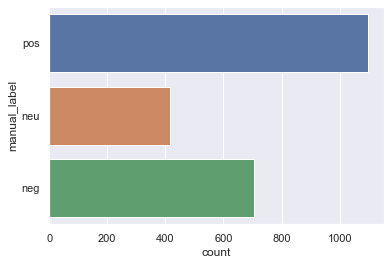

In [ ]:
sb.countplot(y = 'manual_label', data = train_final)

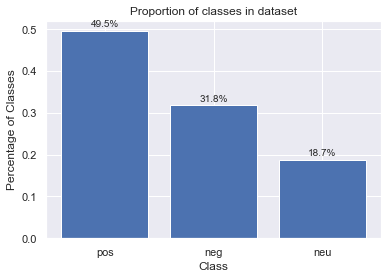

In [ ]:
check_percentage(train_final)

### Test data

In [ ]:
# Check the number of unique labels in test data
print("Number of different labels: ", len(np.unique(test_final['manual_label'])))
num_classes = len(np.unique(test_final['manual_label']))
# Identify the number of data per label
for element in np.unique(test_final['manual_label']):
    print("Number of {} in dataset: {}".format(element, test_final['manual_label'].value_counts()[element]))

Number of different labels:  3
Number of neg in dataset: 21
Number of neu in dataset: 102
Number of pos in dataset: 277


<AxesSubplot: xlabel='count', ylabel='manual_label'>

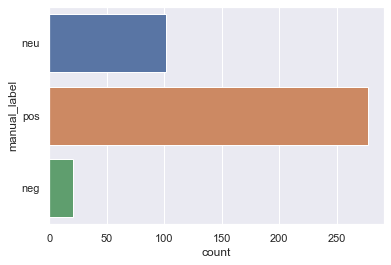

In [ ]:
sb.countplot(y = 'manual_label', data = test_final)

<AxesSubplot: xlabel='count', ylabel='manual_label'>

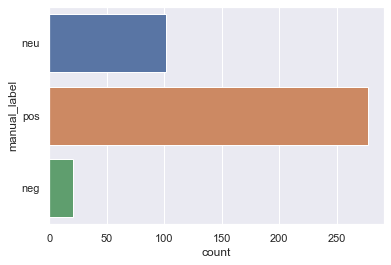

In [ ]:
sb.countplot(y = 'manual_label', data = test_final)

## WordClouds

In [ ]:
def get_wordcloud(text, color='viridis'):
  # Create a WordCloud object
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', colormap=color,collocations=False)
  # Generate a word cloud
  return wordcloud.generate(text)

### Train data

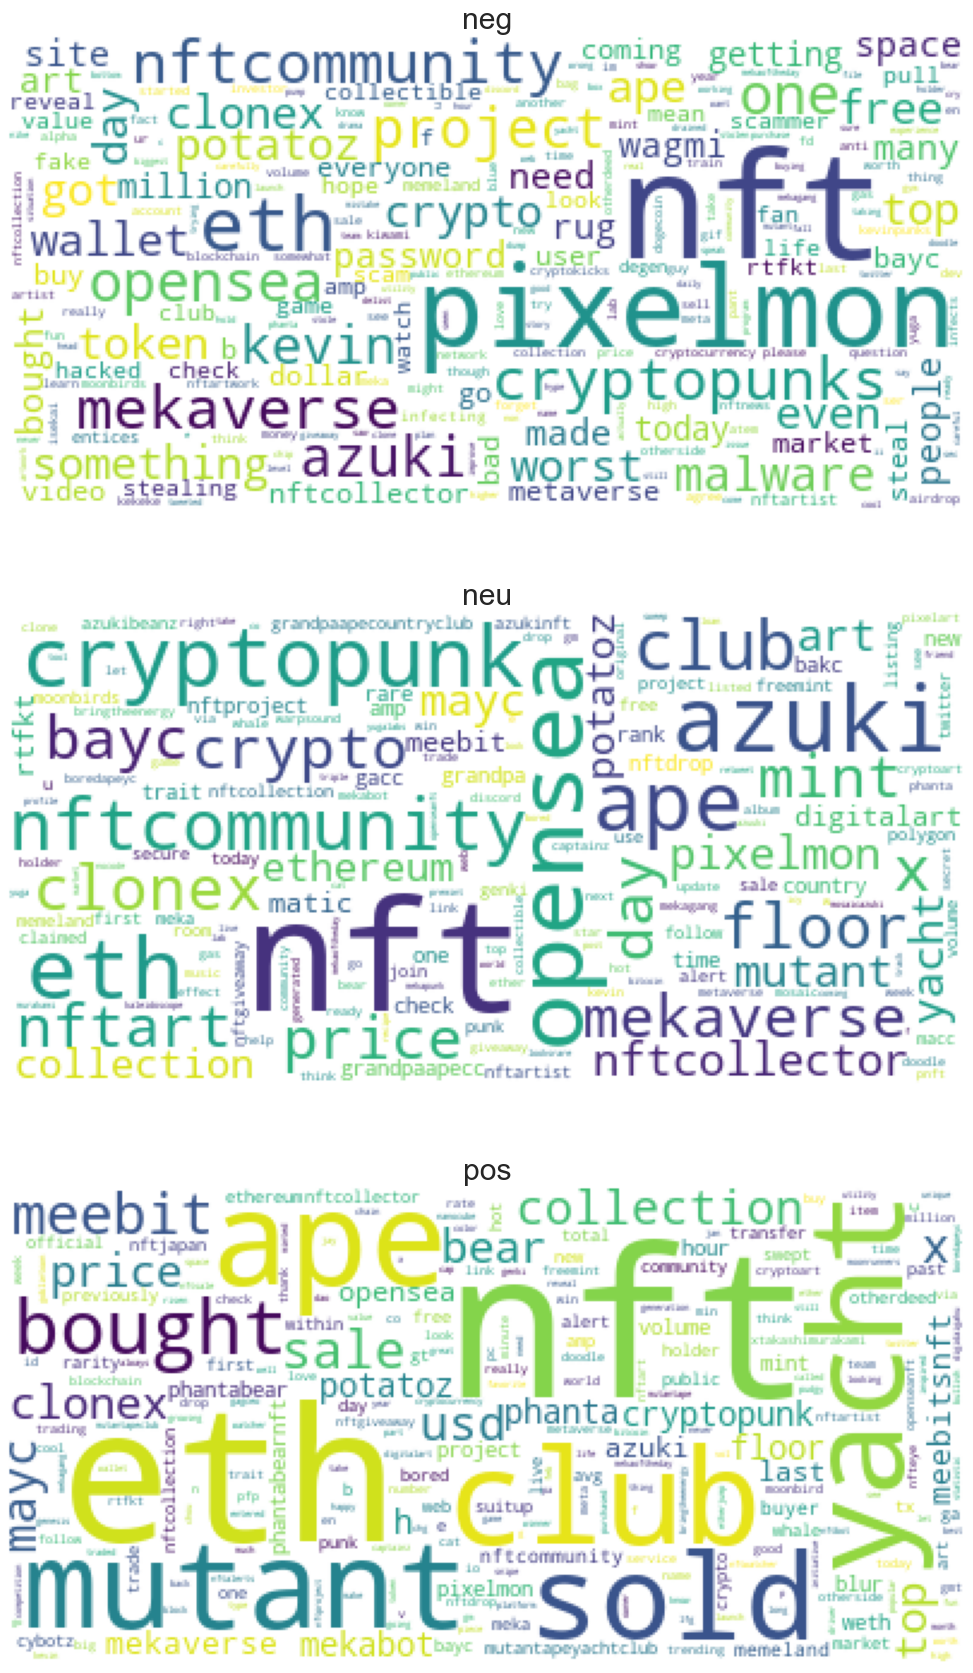

In [ ]:
# WordCloud representation
fig, axes =plt.subplots(3,1, figsize=(30,30))
column  = 0
for label in np.unique(train_final["manual_label"]):
    axes[column].set_title(label, fontsize=30)
    text = ' '.join(train_final["clean_text"][train_final["manual_label"]==label].values)
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', colormap='viridis',collocations=False)
    axes[column].imshow(wordcloud.generate(text))
    axes[column].axis('off')
    extent = axes[column].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #fig.savefig('visualizations//'+label+'_wordcloud.jpg', bbox_inches=extent.expanded(1.1, 1.2))
    column+=1

### Full dataset

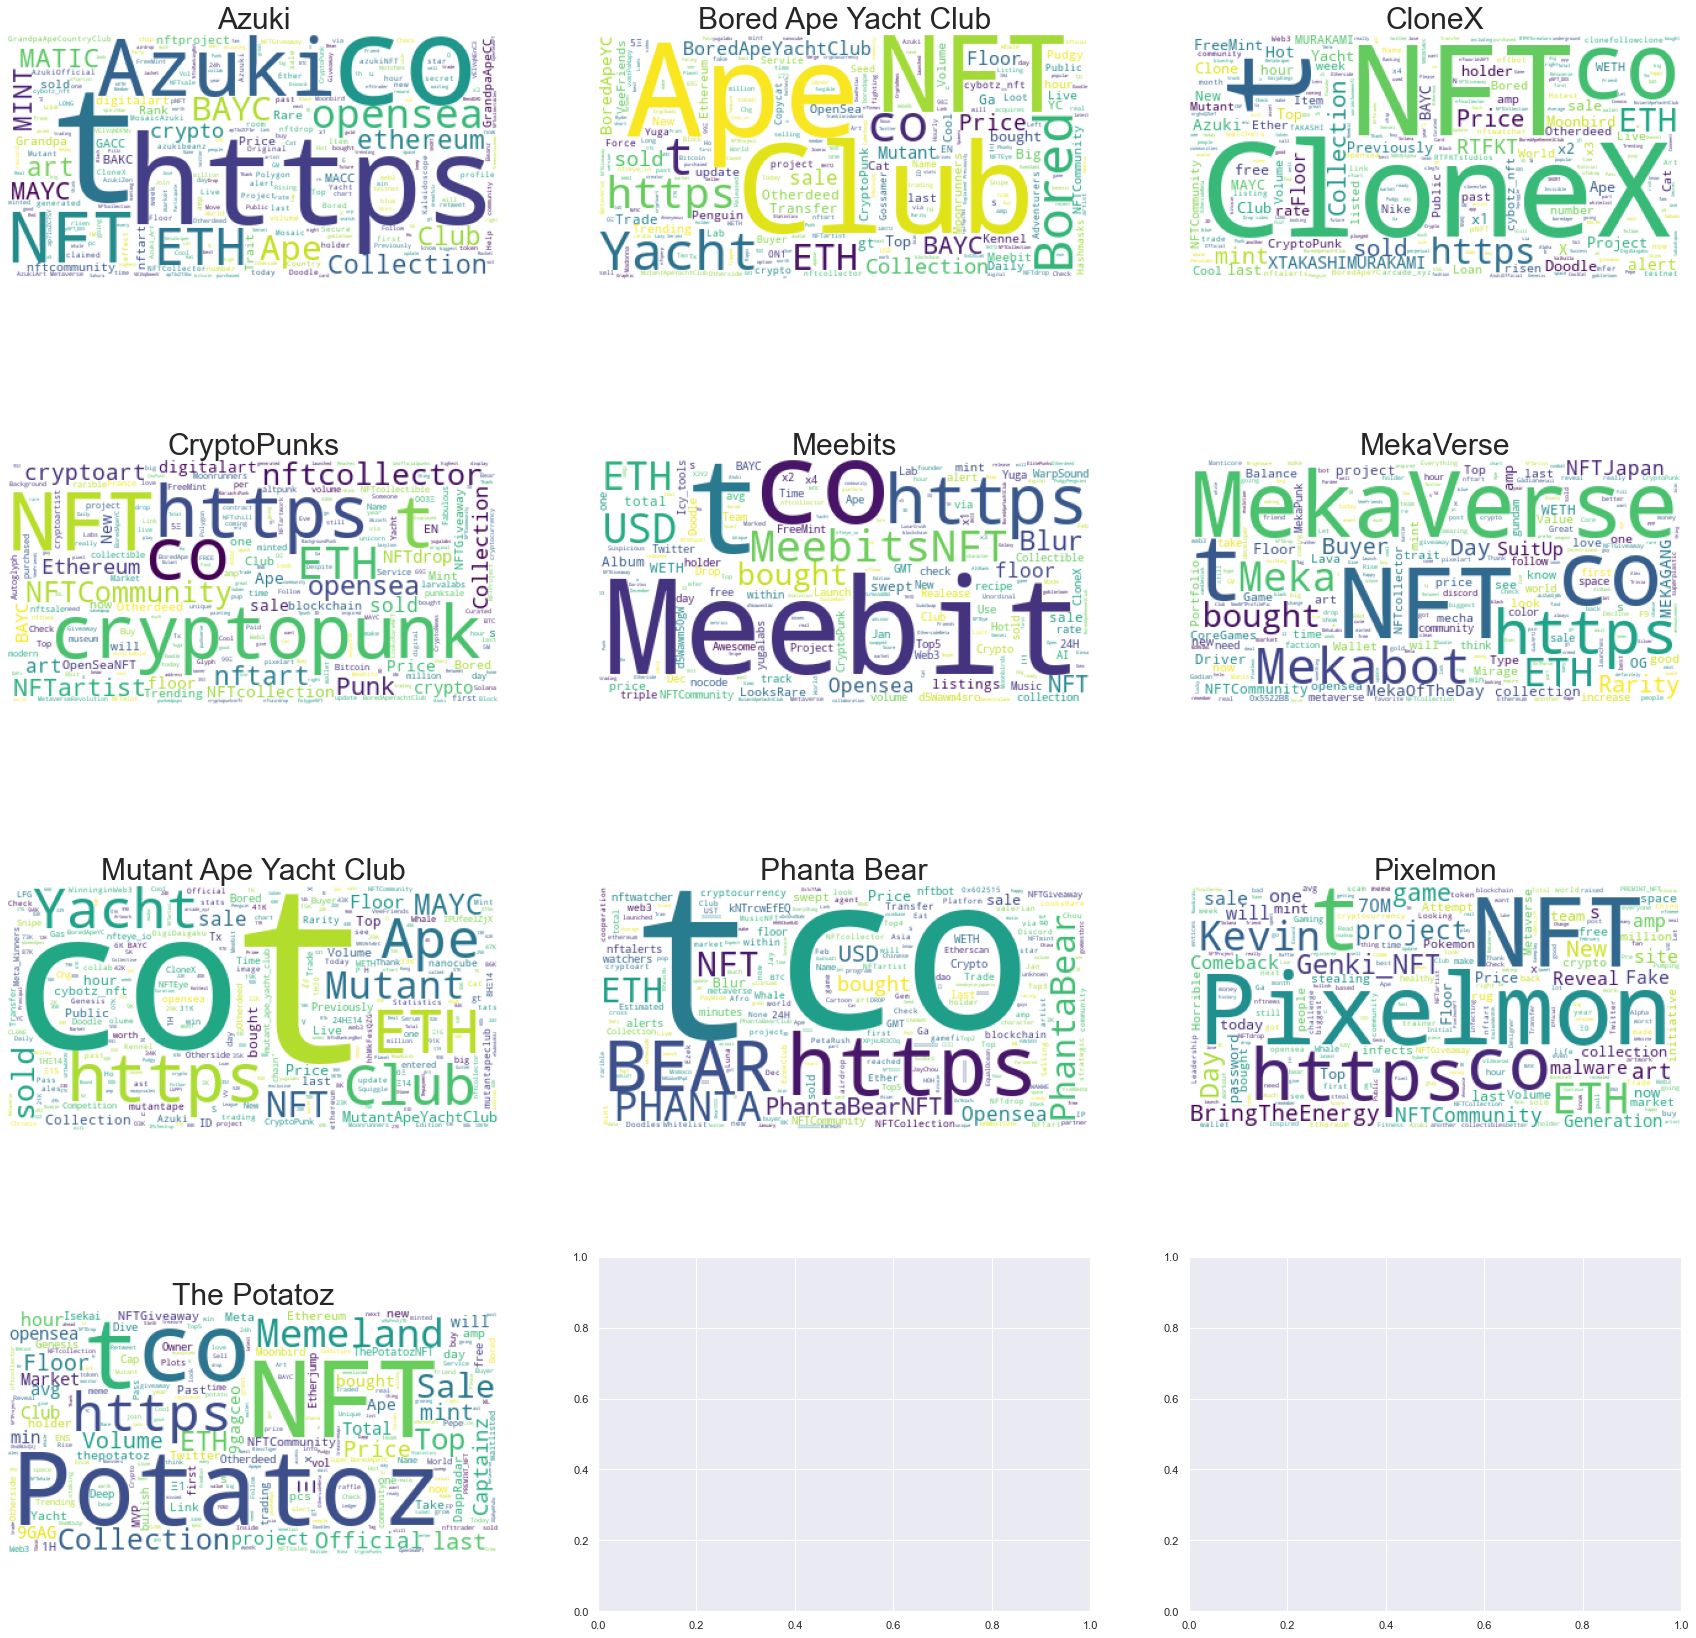

In [ ]:
# WordCloud representation
fig, axes =plt.subplots(4,3, figsize=(30,30))
column  = 0
row = 0
for label in np.unique(twitter_data["NFT"]):
    axes[row][column].set_title(label, fontsize=30)
    text = ' '.join(twitter_data["Text"][twitter_data["NFT"]==label].values)
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', colormap='viridis',collocations=False)
    axes[row][column].imshow(wordcloud.generate(text))
    axes[row][column].axis('off')
    extent = axes[row][column].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #fig.savefig('visualizations//'+label+'_wordcloud.jpg', bbox_inches=extent.expanded(1.1, 1.2))
    column+=1
    if(column>2):
        column = 0
        row+=1
    

## Top 20 most frequent tokens in each class

### Train data

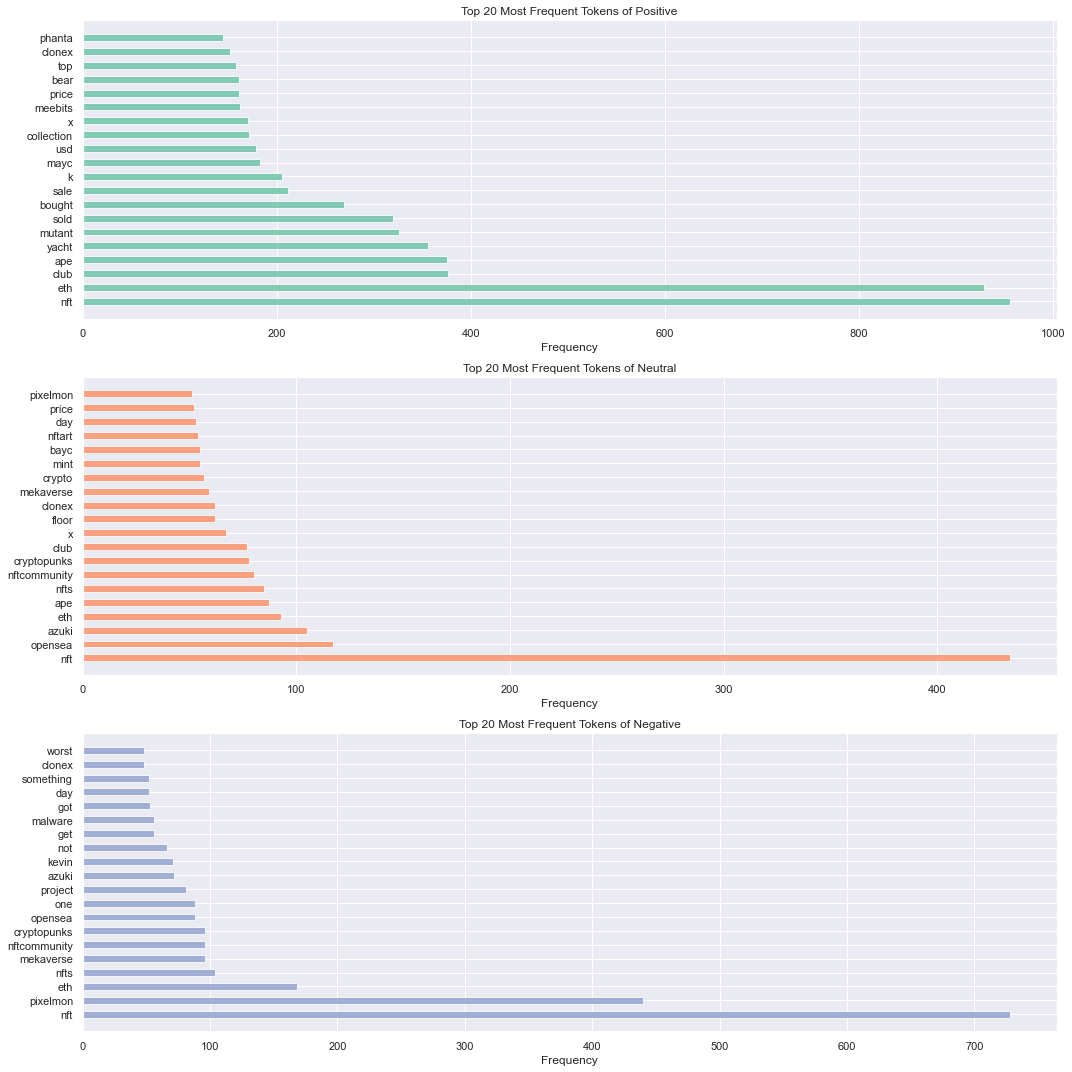

In [ ]:
# Tokenize the tweets and count the frequency of each token for each label
pos_tokens = []
neu_tokens = []
neg_tokens = []

for i, row in train_final.iterrows():
    tokens = word_tokenize(row['clean_text'])
    if row['manual_label'] == 'pos':
        pos_tokens.extend(tokens)
    elif row['manual_label'] == 'neu':
        neu_tokens.extend(tokens)
    elif row['manual_label'] == 'neg':
        neg_tokens.extend(tokens)

pos_tokens_counts = Counter(pos_tokens)
neu_tokens_counts = Counter(neu_tokens)
neg_tokens_counts = Counter(neg_tokens)

# Get the top 20 most common tokens for each label
top_pos_tokens = dict(pos_tokens_counts.most_common(20))
top_neu_tokens = dict(neu_tokens_counts.most_common(20))
top_neg_tokens = dict(neg_tokens_counts.most_common(20))


# Create a separate bar plot for each label
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
bar_width = 0.5
opacity = 0.8
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

axes[0].barh(range(len(top_pos_tokens)), top_pos_tokens.values(),
             bar_width, alpha=opacity, color=colors[0])
axes[0].set_yticks(range(len(top_pos_tokens)))
axes[0].set_yticklabels(list(top_pos_tokens.keys()))
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 20 Most Frequent Tokens of Positive')

axes[1].barh(range(len(top_neu_tokens)), top_neu_tokens.values(),
             bar_width, alpha=opacity, color=colors[1])
axes[1].set_yticks(range(len(top_neu_tokens)))
axes[1].set_yticklabels(list(top_neu_tokens.keys()))
axes[1].set_xlabel('Frequency')
axes[1].set_title('Top 20 Most Frequent Tokens of Neutral')

axes[2].barh(range(len(top_neg_tokens)), top_neg_tokens.values(),
             bar_width, alpha=opacity, color=colors[2])
axes[2].set_yticks(range(len(top_neg_tokens)))
axes[2].set_yticklabels(list(top_neg_tokens.keys()))
axes[2].set_xlabel('Frequency')
axes[2].set_title('Top 20 Most Frequent Tokens of Negative')


plt.tight_layout()
plt.show()